In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics

In [3]:
accident = pd.read_csv("E:/Projects/Machine Learning Projects/Raw Data/Classification/accident.csv")
accident.head(), accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


(   Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
 0   56  Female            27.00          No            No         1
 1   69  Female            46.00          No           Yes         1
 2   46    Male            46.00         Yes           Yes         0
 3   32    Male           117.00          No           Yes         0
 4   60  Female            40.00         Yes           Yes         0,
 None)

DATA PREPROCESSING

---

In [4]:
modes = {
    'Gender' : lambda x:x.mode()[0],
    'Speed_of_Impact' : lambda x:x.mean(),
}
for col, func in modes.items():
    mode_maps = accident.groupby('Survived')[col].agg(func)
    accident[col] = accident[col].fillna(accident['Survived'].map(mode_maps))
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           200 non-null    object 
 2   Speed_of_Impact  200 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [5]:
acc = accident.copy()

In [6]:
enc = LabelEncoder()
obj = acc.select_dtypes(include='object').columns
for i in obj:
    acc[i] = enc.fit_transform(acc[i])
acc.head(2)

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.00,0,0,1
1,69,0,46.00,0,1,1


DATA ANALYSIS

---

In [7]:
sns.set()

In [8]:
def plot(data, x, y=None, hue=None, style='hist'):
    plt.figure(figsize=(15, 5))
    if style=='hist':
        sns.histplot(data[x], kde=True, kde_kws=dict(cut=3))
    elif style=='box':
        sns.boxplot(x=x, y=y, hue=hue, data=data)
    elif style=='count':
        sns.countplot(y=y, data=data, hue=hue)
    else:
        raise ValueError('style unacceptable {style}')
    plt.show()

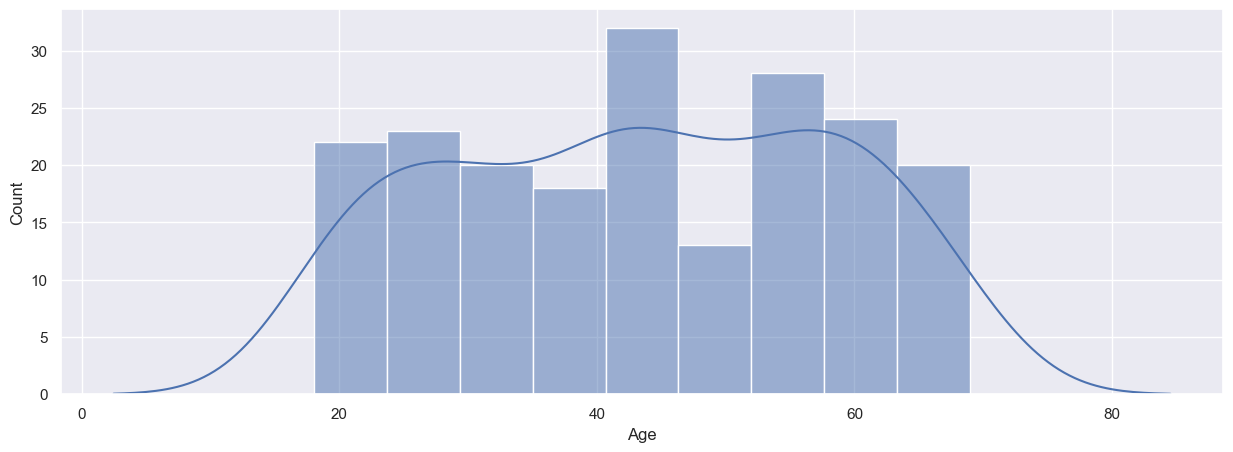

In [9]:
plot(accident, x='Age', style='hist')

In [10]:
corr = acc.corr()
print(corr['Survived'].sort_values(ascending=False))

Survived           1.00
Gender             0.12
Age                0.11
Seatbelt_Used      0.06
Speed_of_Impact    0.04
Helmet_Used       -0.04
Name: Survived, dtype: float64


ML MODEL BUILDING

---

In [11]:
X = acc.iloc[:,:-1]
y = acc.iloc[:,-1]

sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clas = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clas.fit(X_train, X_test, y_train, y_test)

100%|██████████| 32/32 [00:02<00:00, 11.44it/s]

[LightGBM] [Info] Number of positive: 80, number of negative: 80
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 91
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [12]:
models.head()

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.62,0.62,0.62,0.62,0.03
QuadraticDiscriminantAnalysis,0.55,0.55,0.55,0.55,0.02
Perceptron,0.55,0.54,0.54,0.54,0.02
SVC,0.53,0.53,0.53,0.52,0.03
LinearSVC,0.53,0.52,0.52,0.52,0.03


In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Create an instance of the classifier
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=42)

# Fit the classifier to the training data
pac.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pac.predict(X_test)

# Evaluate the classifier
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy for test is : {accuracy}')

Accuracy for test is : 0.625
